In [19]:
## Simple Accuracy

def accuracy(y_true,y_pred):
    """
    Function to calculate accuracy:
    param y_true: list of true values:
    param y_pred: list of predicted values:
    return: accuracy score
    """

    # Initialize  a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true and y_pred together

    for yt,yp in zip(y_true,y_pred):
        if yt == yp:
            correct_counter +=1
    # Return Accuracy, i.e. correct predictions over samples
    return correct_counter/len(y_true)



from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

metrics.accuracy_score(l1,l2)



0.625

In [20]:
## TP,TN,FP,FN

def true_positive(y_true,y_pred):
    tp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 1:
            tp +=1
    return tp

def true_negative(y_true,y_pred):
    tn = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 0:
            tn +=1
    return tn

def false_positive(y_true,y_pred):
    fp = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp == 1:
            fp +=1
    return fp


def false_negative(y_true,y_pred):
    fn = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn +=1
    return fn

In [21]:
print("TP:",true_positive(l1,l2),"TN:",true_negative(l1,l2),"FP:",false_positive(l1,l2),"FN:",false_negative(l1,l2))

TP: 2 TN: 3 FP: 1 FN: 2


In [22]:
## Aaccuracy using confusion Matrix

def accuracy_v2(y_true,y_pred):

    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    tn = true_negative(y_true,y_pred)

    accuracy_score = (tp + tn)/(tp + tn + fp + fn)

    return accuracy_score

In [23]:
## ACcuracy by all 3 functions

accuracy(l1,l2) , accuracy_v2(l1,l2) , metrics.accuracy_score(l1,l2)

(0.625, 0.625, 0.625)

In [24]:
## Precision = TP/(TP + FP)
## Postive Predicted Value-PPV

def precision(y_true,y_pred):

    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)

    precision = tp/(tp+fp) ## How much Precise about positives we predicted.

    return precision

precision(l1,l2)

0.6666666666666666

In [25]:
## Recall = TP/(TP + FN) 
## True Positive Rate - TPR
## Sensitivity
## Hit rate

def recall(y_true,y_pred):

    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)

    recall = tp/(tp+fn) ## Out of All Actual Positives How much did we recalled correctly

    return recall

recall(l1,l2)

0.5

Text(0, 0.5, 'Precision')

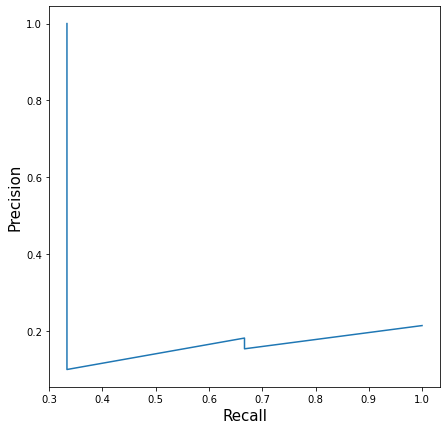

In [26]:
## Precision Recall Curve
## Most of the models predict a probability,and when we predict, we usually choose this threshold to be 0.5. This threshold is not always ideal,and depending on this threshold, your value of precision and recall can change drastically. If for every threshold we choose, we calculate the precisionand recall values, we can create a plot between these sets of values. This plot or curve is known as the precision-recall curve.##

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937,  0.0191491,  0.17554844, 0.15952202, 0.03819563, 0.11639273, 0.079377,   
0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]

precisions = []
recalls = []

thresholds = [0.0490937, 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273, 0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815, 0.39095342, 0.61977213]

## For every threshold lets calculate predictions and then precision, recall

for i in thresholds:
    temp_prediction = [1 if x >=i else 0 for x in y_pred]
    p = precision(y_true,temp_prediction)
    r = recall(y_true,temp_prediction)
    precisions.append(p)
    recalls.append(r)



import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot(recalls,precisions)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)

In [27]:
## F1 is harmonic mean(Weigted average) of Precision and Recall
## F1 = 2* Prec * Recall /(Prec + Recall)

def f1(y_true,y_pred):

    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)

    score = 2 * p * r /(p + r)

    return score

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true,y_pred)

0.5714285714285715

In [28]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [29]:
## FPR
## Specificity = TNR = 1 - FPR

def fpr(y_true,y_pred):
    fp = false_positive(y_true,y_pred)
    tn = true_negative(y_true,y_pred)

    return fp/(fp + tn)

In [30]:
## Receiver Operating Characteristics (ROC Curve) - TPR vs FPR
## Area under ROC Curve (AUC)

tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

#  loop over all thresholds
for thresh in thresholds:
     # calculate predictions for a given threshold
     temp_pred = [1 if x >= thresh else 0 for x in y_pred]
     # calculate tpr
     temp_tpr = recall(y_true, temp_pred)
     # calculate fpr
     temp_fpr = fpr(y_true, temp_pred)
     # append tpr and fpr to lists
     tpr_list.append(temp_tpr)
     fpr_list.append(temp_fpr)

In [31]:
import pandas as pd

## As Theshold Increases TP dec, FN inc thus TPR dec
## As Theshold Decreases FP inc, TN dec thus FPR inc

ROC_df = pd.DataFrame()
ROC_df['threshold'] = thresholds
ROC_df['TPR'] = tpr_list
ROC_df['FPR'] = fpr_list

ROC_df

,threshold,TPR,FPR
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


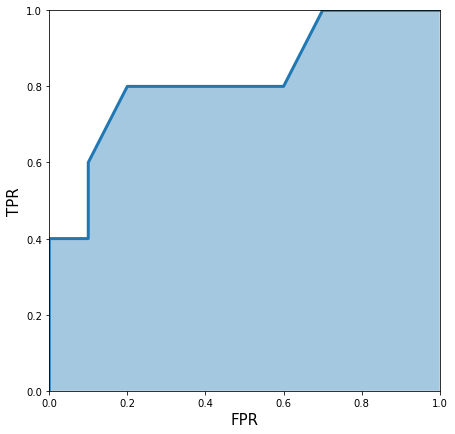

In [32]:
# AUC-ROC Curve Graph
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [33]:
## AUC - ROC Curve from sklearn
from sklearn import metrics

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [34]:
## TP and FP for different thresholds

# empty lists to store true positive # and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds

for i in thresholds:
    temp_pred = [1 if x >= i else 0 for x in y_pred]
    temp_tp = true_positive(y_true,y_pred)
    temp_fp = false_positive(y_true,y_pred)
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

df_tp_fp = pd.DataFrame()
df_tp_fp['threshold'] = thresholds
df_tp_fp['TP'] = tpr_list
df_tp_fp['FP'] = fpr_list

df_tp_fp


,threshold,TP,FP
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


In [35]:
## Log Loss
## Log Loss = -1*(y_true*log(y_pred) + (1-y_true)*log(1-y_pred))
## Log Loss punishes for incorrect or faroff predictions. i.e. Punishes for being very sure(high prob) and simultaneously very wrong(far_off from y_true)
## Over multiple samples its just an avg of all individual log losses

import numpy as np 
def log_loss(y_true,y_pred):
    # Epsilon value used to clip probabilities
    epsilon =1e-15

    loss = []

    for yt,yp in zip(y_true,y_pred):
        # adjust probability
        # # 0 gets converted to 1e-15
        # # 1 gets converted to 1-1e-15
        # # Why? As log 0 is undefined
        yp = np.clip(yp, epsilon, 1-epsilon)
        # calculate loss for one sample
        temp_loss = -1.0* (yt * np.log(yp) + (1-yt) * np.log(1-yp))
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [36]:
# Log loss using sklearn

from sklearn import metrics
metrics.log_loss(y_true,y_proba)


0.49882711861432294

In [47]:
## Multi Class CLassification Metrics
# Majorly 3 ways to aggregate metrics
# 1) Macro Averaged - Precision for all classes and then straight average
# 2) Micro Averaged - Class wise TP and FP and then summing them to calculate overall precision
# 3) Weighted - Same as Macro but weighted avg instead of straight avg. Weighted by no of items in each class

## Macro Averaged Precision

import numpy as np 

def macro_precicion(y_true,y_pred):

    # find no of unique class
    num_classes = len(np.unique(y_true))

    #initialize precision to 0
    precision = 0

    # loop over all classes

    for class_ in range(num_classes): ## this assumes class unique values are starting from 0 to num_classes-1

        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp = true_positive(temp_true,temp_pred)
        fp = false_positive(temp_true,temp_pred)

        temp_precision = tp/(tp+fp)
        precision += temp_precision

    return precision/num_classes




In [46]:
# Micro Averaged Precision

import numpy as np 

def micro_precicion(y_true,y_pred):
    tp =0
    fp =0

     # find no of unique class
    num_classes = len(np.unique(y_true))

    # loop over all classes

    for class_ in range(num_classes): ## this assumes class unique values are starting from 0 to num_classes-1

        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        temp_tp = true_positive(temp_true,temp_pred)
        temp_fp = false_positive(temp_true,temp_pred)

        tp += temp_tp
        fp += temp_fp
    precision = tp/(tp + fp)

    return precision

In [62]:
# Understanding Counter function

from collections import Counter
list  = [1,2,1,1,2,4,0]
l = Counter(list)
l

Counter({1: 3, 2: 2, 4: 1, 0: 1})

In [63]:
l[1]

3

In [64]:
## Weighted Precision

## Using basic math (By me)
import numpy as np 

# def weighted_precision(y_true,y_pred):

#     # find no of unique class
#     num_classes = len(np.unique(y_true))

#     #initialize precision to 0
#     precision = 0
#     count = 0
#     # loop over all classes

#     for class_ in range(num_classes): ## this assumes class unique values are starting from 0 to num_classes-1

#         # all classes except current are considered negative
#         temp_true = [1 if p == class_ else 0 for p in y_true]
#         temp_pred = [1 if p == class_ else 0 for p in y_pred]

#         tp = true_positive(temp_true,temp_pred)
#         fp = false_positive(temp_true,temp_pred)

#         temp_count = np.sum(temp_true)
#         temp_precision = tp/(tp+fp)
#         precision += temp_precision*temp_count
#         count += temp_count

#     return precision/count


# Using dictionary
from collections import Counter

def weighted_precision(y_true,y_pred):

    # find no of unique class
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # # it looks something like this:# {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)

    #initialize precision to 0
    precision = 0

    # loop over all classes

    for class_ in range(num_classes): ## this assumes class unique values are starting from 0 to num_classes-1

        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp = true_positive(temp_true,temp_pred)
        fp = false_positive(temp_true,temp_pred)

        temp_precision = tp/(tp+fp)

        weighted_precicion = class_counts[class_] * temp_precision
        precision += weighted_precicion
    
    overall_precision = precision/len(y_true)
    return overall_precision



In [50]:
# Compare  Results with sklearn

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_precicion(y_true,y_pred),metrics.precision_score(y_true,y_pred, average="macro")

(0.3611111111111111, 0.3611111111111111)

In [51]:
micro_precicion(y_true,y_pred),metrics.precision_score(y_true,y_pred, average="micro")

(0.4444444444444444, 0.4444444444444444)

In [65]:
weighted_precision(y_true,y_pred),metrics.precision_score(y_true,y_pred, average="weighted")

(0.39814814814814814, 0.39814814814814814)

In [70]:
# Weighted f1
from collections import Counter
import numpy as np 

def weighted_f1(y_true,y_pred):

    num_classes = len(np.unique(y_true))

    class_counts =Counter(y_true)

    weighted_f1 = 0

    for i in range(num_classes):

        temp_true = [1 if x == i else 0 for x in y_true]
        temp_pred = [1 if x == i else 0 for x in y_pred]

        p = precision(temp_true,temp_pred)
        r = recall(temp_true,temp_pred)

        if p + r !=0:
            temp_f1 = 2 * p * r/(p+r)
        else:
            temp_f1 = 0

        weighted_f1 += temp_f1*class_counts[i]
    
    overall_f1 = weighted_f1/len(y_true)

    return overall_f1


In [71]:
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

metrics.f1_score(y_true,y_pred,average='weighted'),weighted_f1(y_true,y_pred)

(0.41269841269841273, 0.41269841269841273)